# <center>Dijkstra's Algorithm</center>

<hr>

## Introduction


To find the optimal path that connect two points of the complex network of streets, ways and highways seems a very difficult task as the number of paths that we should explore grows in general exponentially with the distance between the two points. Let's consider as an example the directed polymer drawn below.



<figure>
<center>
<img src='https://raw.githubusercontent.com/Schimmenti/QuantumInformationPoD/master/directed.png' />
</center>
</figure>

* How many polymers you can draw from $0$ to $t$?
* Select a polymer at random. How $x_t$ scales with $t$?
* How many polymers you can draw from $(0,0)$ to $(t,x_t)$, with $x_t$ given?



## Dijkstra algorithm


The algorithm implements the following recursion relation

$$E(t',x) = V_{t',x} + \min\left( E(t'-1,x-1), E(t'-1,x+1) \right)$$

* How many operations are needed to implement this relation?

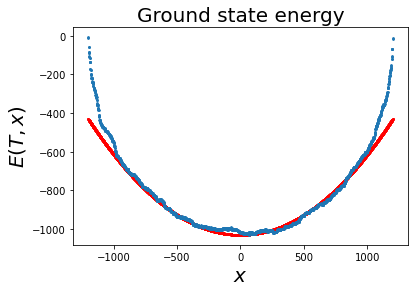

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
T  =  1200
E = [np.infty for n in range(-T,T-1)]
E[0] = 0
for time in range(1,T) :
    for n in range(time+1) :
        x = time - 2*n
        E[x] = min(E[x-1],E[x+1]) + np.random.randn()

x = np.append(np.arange(0,T), np.arange(-T+1,0))
plt.scatter(x, x**2/(2*T)-1030, color='red', s=4)
plt.scatter(x,E, s=3)
plt.ylabel('$E(T,x)$', size=20)
plt.xlabel('$x$', size=20)
plt.title(r'Ground state energy', fontsize=20)
plt.show()

* In order to draw the polymer you need a second step

In [6]:
def ground_state(T):
  E = [np.infty for n in range(-T,T-1)]
  E[0] = 0
  network=[[0 for n in range(-T,T)] for i in range(T)]
  for time in range(1,T):
    for n in range(time+1) :
      x = time - 2*n
      E[x] = min(E[x-1],E[x+1]) + np.random.randn()
      network[time][x] = 2*(E[x-1]>E[x+1])-1
  return E, network

In [7]:
def build_polymer(T, x0, network):
  polymer = np.zeros(T)
  position = x0
  polymer[T-1] = position
  for time in range(1,T-1):
    direction =network[T-time][position]
    position+=direction
    polymer[T-1-time]=position
  return polymer

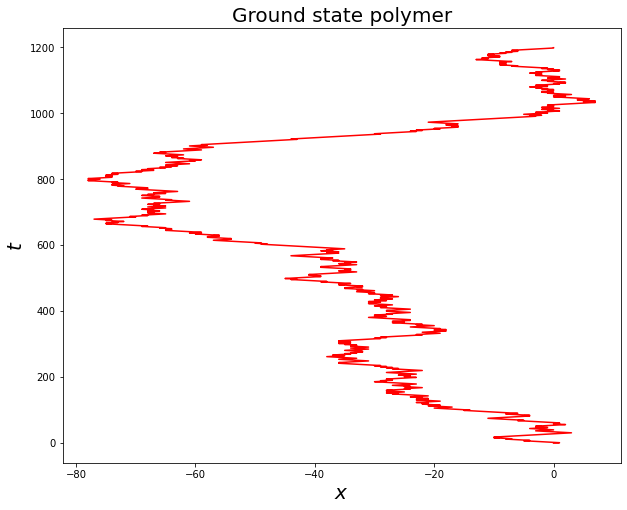

In [8]:
np.random.seed(15)
T=1200
E, network = ground_state(T)
polymer1 = build_polymer(T, 0, network)
polymer2 = build_polymer(T, 2, network)

#polymer1 = build_polymer(T, 68, network)
#polymer2 = build_polymer(T, 70, network)


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(polymer1, np.arange(0,T), 'r', markersize=2)
#plt.plot(polymer2, np.arange(0,T), 'b', markersize=2)
plt.ylabel('$t$', size=20)
plt.xlabel('$x$', size=20)

plt.title(r'Ground state polymer', fontsize=20)
plt.show()

* Is it possible to find the polymer with the energy closest to zero?
* Is it possible to generalize at finite temperature?

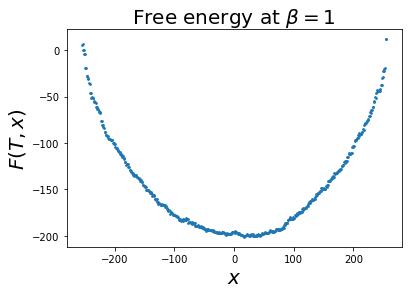

In [9]:
import pylab, random,math
random.seed(-1)
T  = 256
beta=.5
Z=[0 for n in range(-T,T-1)]
Z[0]=1
F = [0 for n in range(-T,T-1)]
xfree=0
for time in range(1,T) :
    xmax=-1
    for n in range(time+1):
        x=time-2*n
        Z[x]=(Z[x-1]+Z[x+1])*math.exp(-beta*random.gauss(0,1))
        if xmax <Z[x]:
           xmax=Z[x]
    xfree+=math.log(xmax)
    Z[:] = [x/xmax for x in Z] 
for n in range(-T,T-1):
    F[n] = -xfree - math.log(Z[n])     
x = np.append(np.arange(0,T), np.arange(-T+1,0))
#plt.scatter(x, x**2/(2*T)-200, color='red', s=4)
plt.scatter(x,F, s=3)
plt.ylabel('$F(T,x)$', size=20)
plt.xlabel('$x$', size=20)
plt.title(r'Free energy at $\beta=1$', fontsize=20)
pylab.show()

References

* Kardar, M. (2007). Statistical physics of fields. Cambridge University Press. Chapter 10